# [View in nbviewer to see the interactive chart](https://nbviewer.org/github/HighTechnologyFoundation/HTFCloudFellows/blob/Justin-Lin/USGS%20-%20Earthquake/Earthquake_analysis.ipynb)

## Analysis and Visualization using earthquake data from [United States Geological Survey (USGS)](https://earthquake.usgs.gov/earthquakes/search/)

### Exploring different plotting packages:
- `matplotlib`
- `plotly`
- `geopandas`
- `pygmt`
---

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)

df = pd.read_csv('query.csv')

df['date'] = pd.to_datetime(df.time).dt.strftime('%Y/%m/%d')

df['time'] = pd.to_datetime(df.time).dt.strftime('%H:%M:%S')

df = df[['date', 'time', 'latitude', 'longitude', 'depth', 'mag', 'place']].rename(columns = {'mag' : 'magnitude'})

df.head()

date      time   latitude   longitude    depth  magnitude  \
0  2024/04/29  17:31:25  17.802600  -66.959500    9.000       3.45   
1  2024/04/29  17:28:54  18.893833  -64.815167   15.130       3.14   
2  2024/04/29  17:15:19  17.806667  -66.955500   11.430       2.77   
3  2024/04/29  16:21:46  24.064600  121.669100   25.217       4.20   
4  2024/04/29  16:14:41  45.290800  148.475000  151.430       4.30   

                                               place  
0                  19 km SSW of Guánica, Puerto Rico  
1  62 km NNE of Charlotte Amalie, U.S. Virgin Isl...  
2                  18 km SSW of Guánica, Puerto Rico  
3                   11 km NE of Hualien City, Taiwan  
4                        47 km E of Kuril’sk, Russia

In [3]:
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
import plotly.io as pio
pio.renderers.default = 'notebook'

fig = px.scatter_geo(df, lat='latitude',
                     lon='longitude',
                     color="magnitude",
                     hover_name = 'place',
                     fitbounds='locations'
                     )

fig.update_geos(projection_type="natural earth")

fig.update_layout(title_text = f'Earthquake (magnitude > 2.5) from {min(df.date)} to {max(df.date)}', title_x=0.5)

fig.show()

In [4]:
import geopandas as gpd
df_Taiwan = df[df.place.str.contains('Taiwan')]

gdf = gpd.GeoDataFrame(
    df_Taiwan, geometry=gpd.points_from_xy(df_Taiwan.longitude, df_Taiwan.latitude), crs="EPSG:4326"
)

gdf.explore('magnitude')

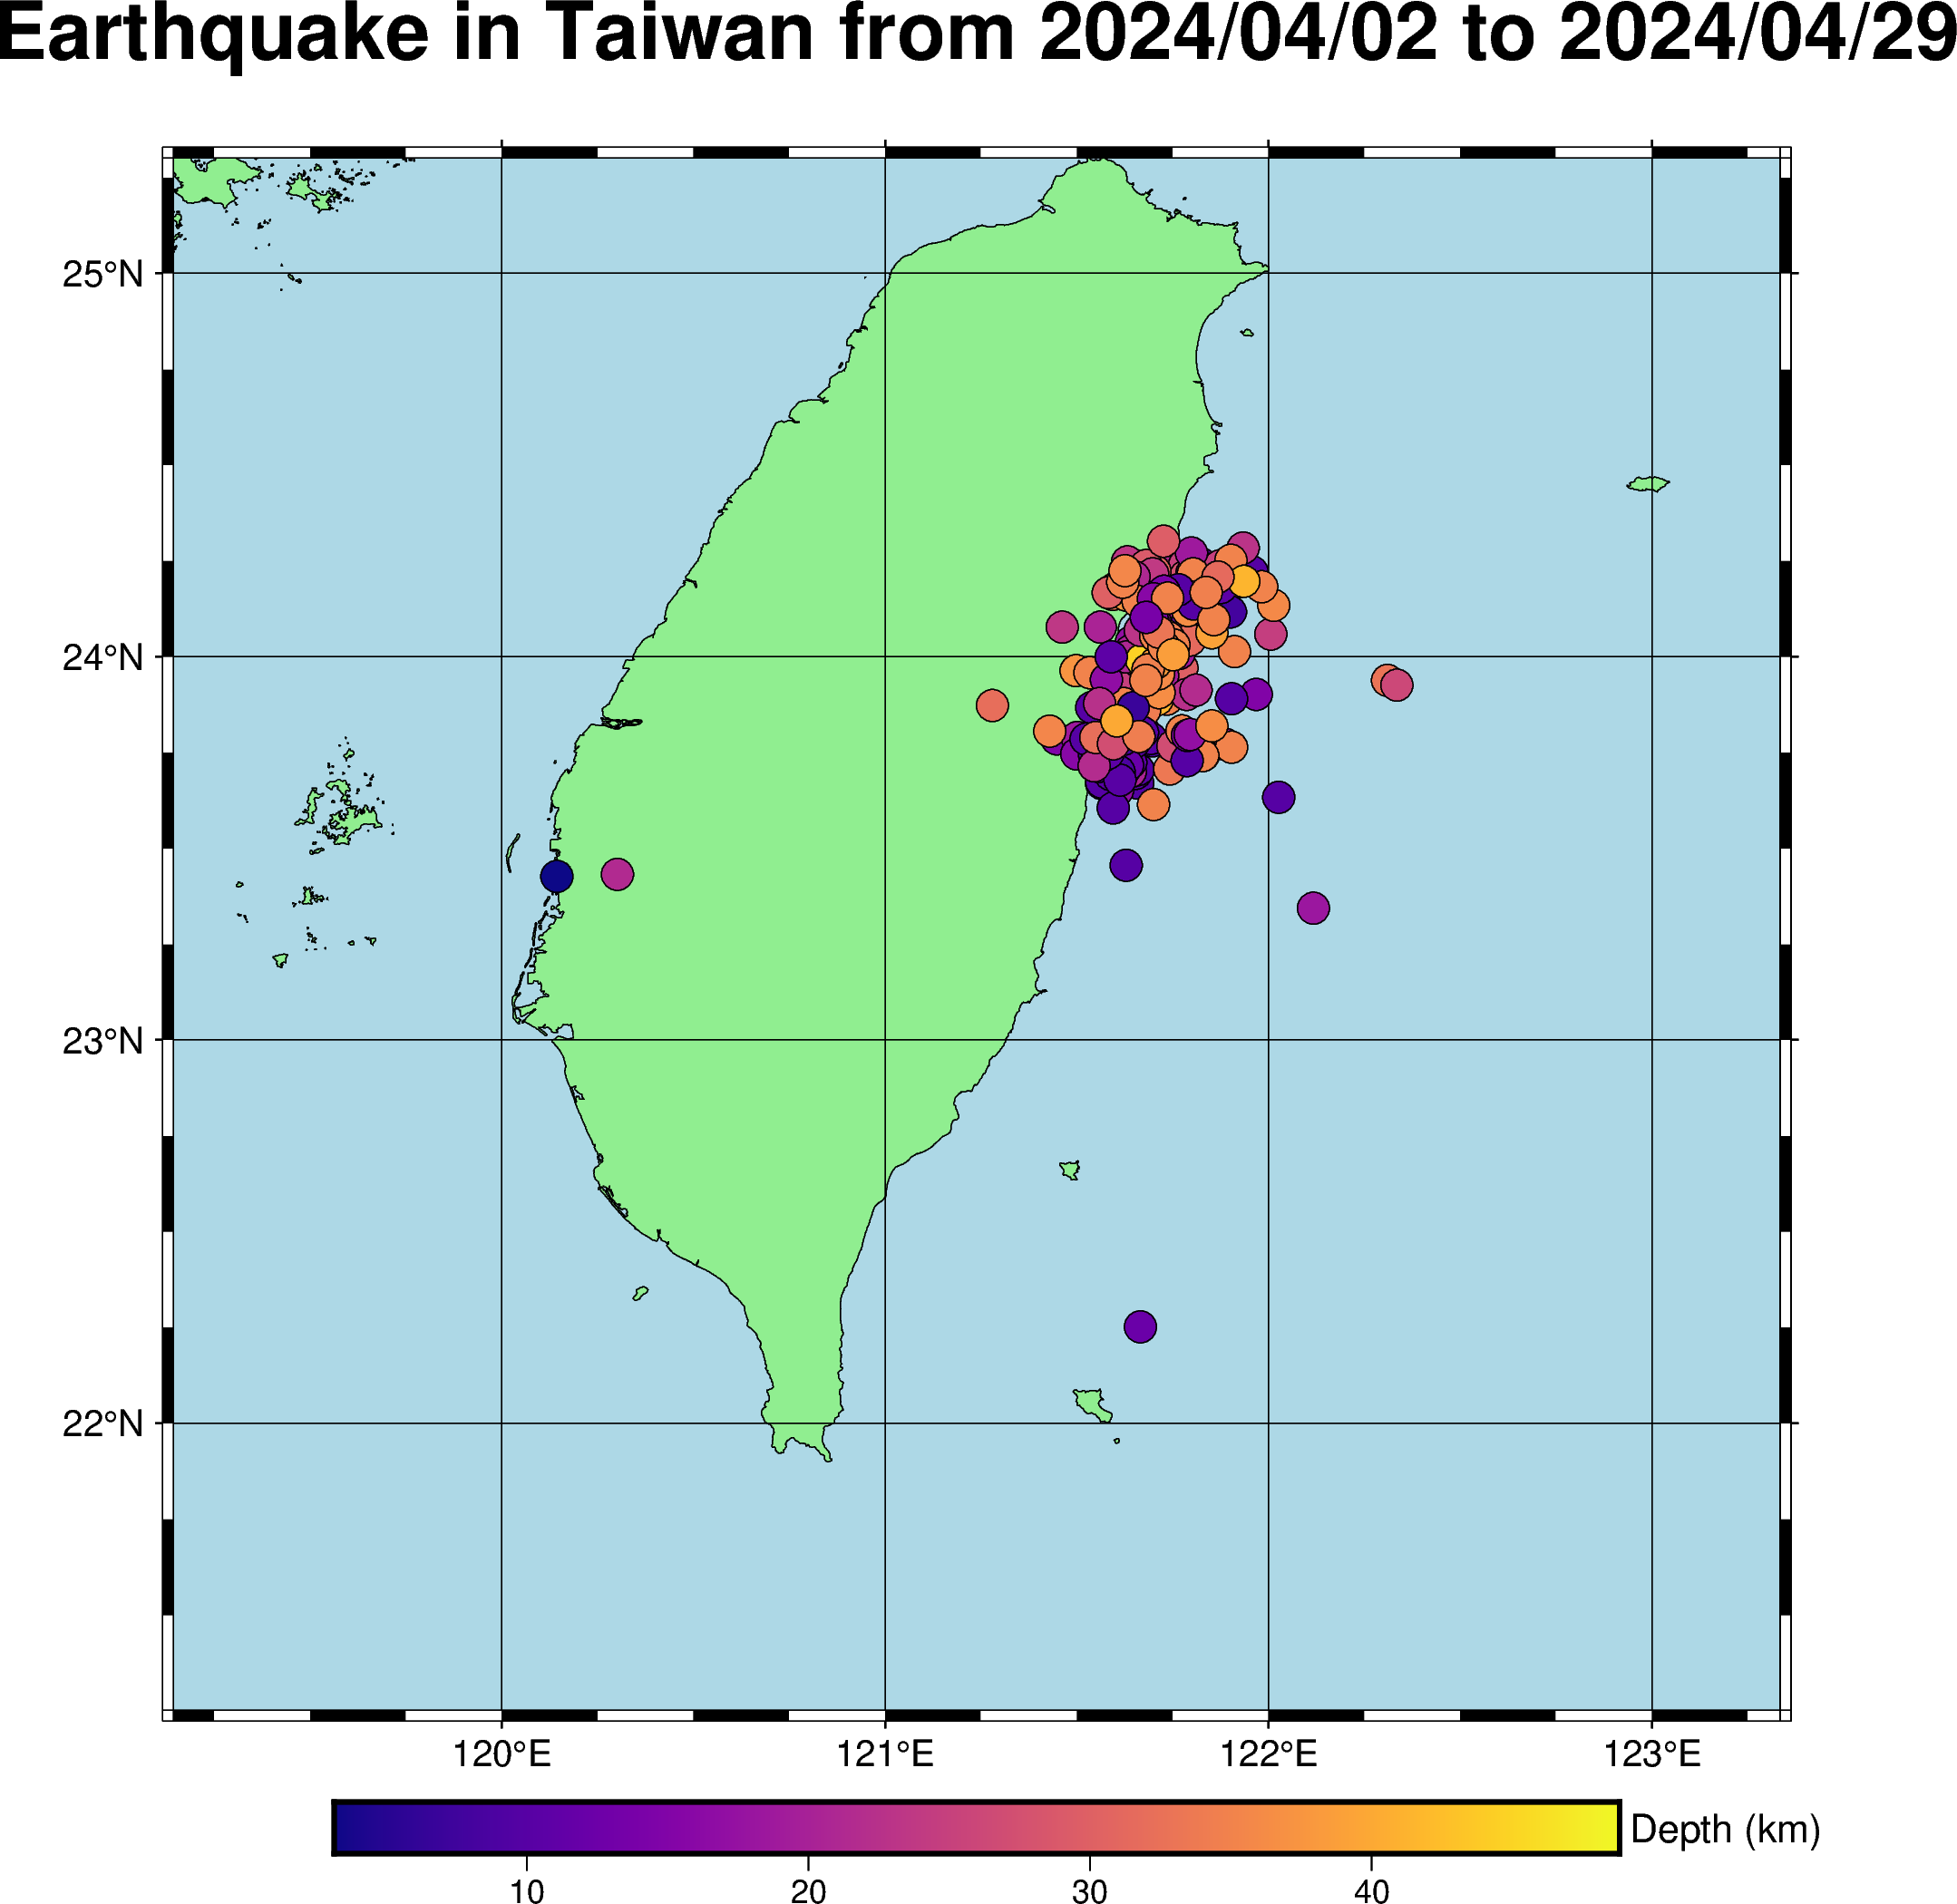

In [5]:
import pygmt

region = [
    df_Taiwan.longitude.min() - 1,
    df_Taiwan.longitude.max() + 1,
    df_Taiwan.latitude.min() - 1,
    df_Taiwan.latitude.max() + 1,
]

fig = pygmt.Figure()

fig.coast(region=region, shorelines=True, land="lightgreen", water="lightblue")

fig.basemap(frame=["afg", f'+tEarthquake in Taiwan from {min(df_Taiwan.date)} to {max(df_Taiwan.date)}'])

pygmt.makecpt(cmap="plasma", series=[df_Taiwan.depth.min(), df_Taiwan.depth.max()])

fig.plot(
    x=df_Taiwan.longitude,
    y=df_Taiwan.latitude,
    fill=df_Taiwan.depth,
    cmap = True,
    style="c0.3c",
    pen="black"
)
fig.colorbar(frame=["a", "y+lDepth (km)"])
fig.show()

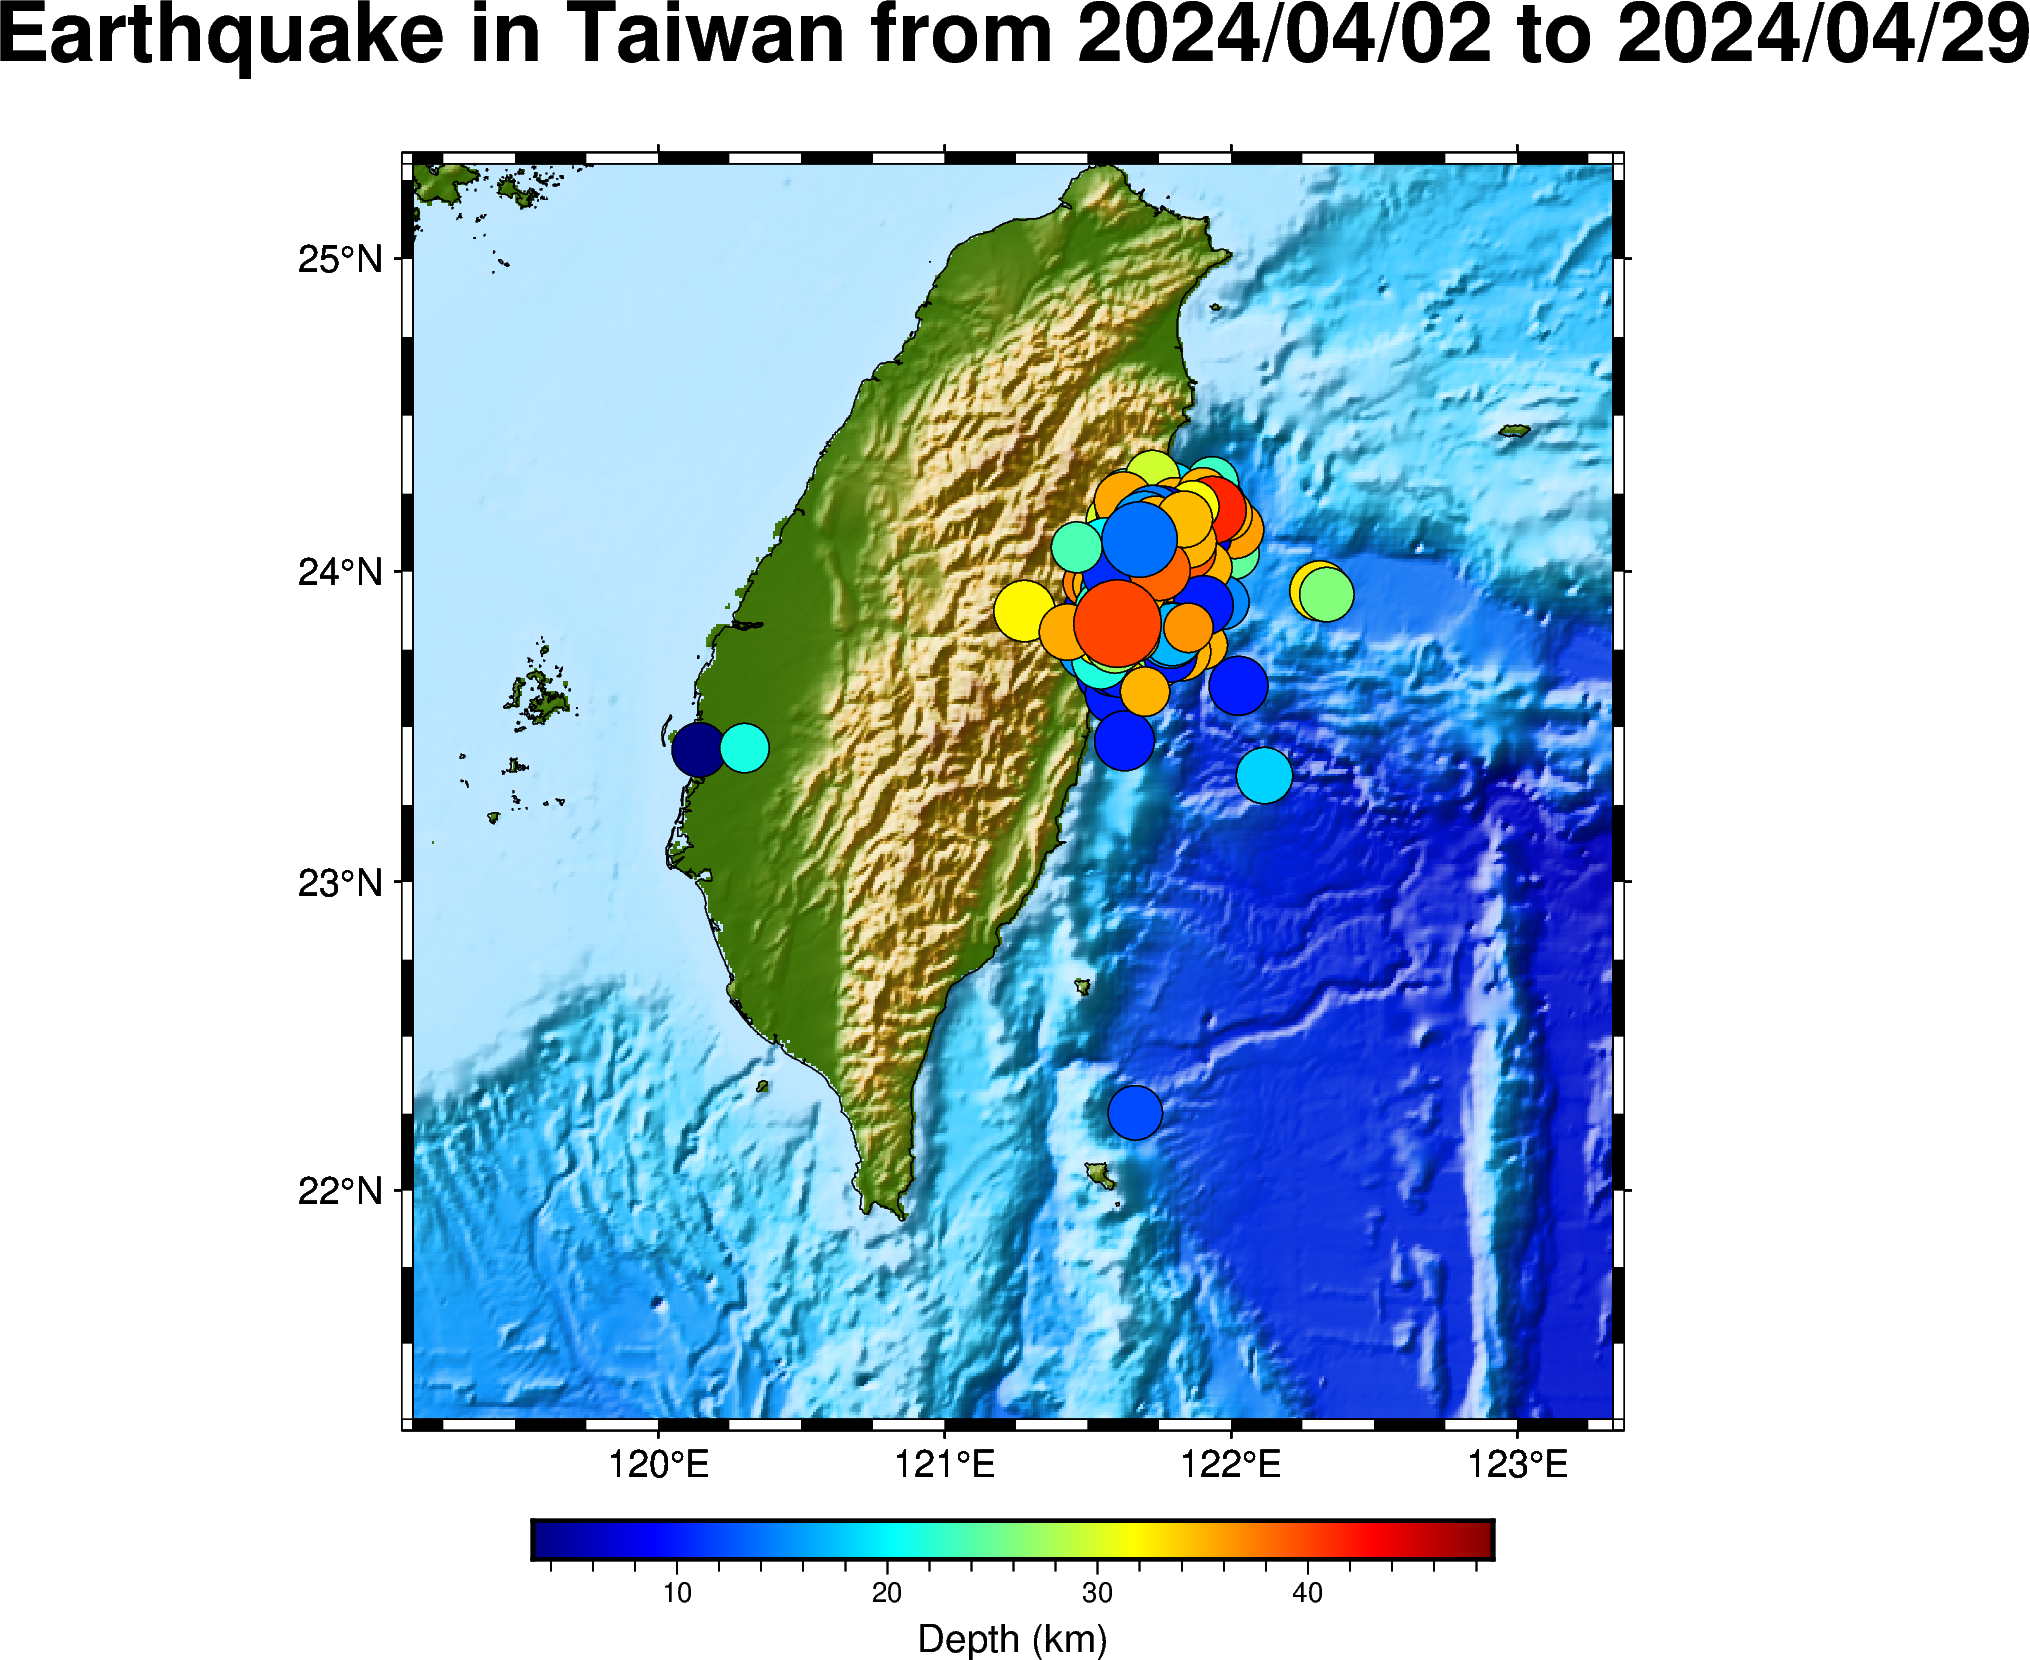

In [6]:
fig = pygmt.Figure()

# make color pallets
pygmt.makecpt(
    cmap='etopo1',
    series='-8000/5000/1000', #min elevation of -8000m and max of 5000m
    continuous=True
)
# define etopo df_Taiwan file
topo_df_Taiwan = "@earth_relief_30s"
# plot high res topography
fig.grdimage(
    grid=topo_df_Taiwan,
    region=region,
    projection='M4i',
    shading=True,
    frame=True
)

fig.coast(shorelines=True, frame=True)

# colorbar colormap
pygmt.makecpt(cmap="jet", series=[
              df_Taiwan.depth.min(), df_Taiwan.depth.max()])
fig.plot(
    x=df_Taiwan.longitude,
    y=df_Taiwan.latitude,
    size=0.1*df_Taiwan.magnitude,
    fill=df_Taiwan.depth,
    cmap=True,
    style="cc",
    pen="black",
)

fig.basemap(frame=f'+tEarthquake in Taiwan from {min(df_Taiwan.date)} to {max(df_Taiwan.date)}')

fig.colorbar(frame='af+l"Depth (km)"')

fig.show()

In [11]:
df = pd.read_csv('earthquake_6.5+.csv')
df['year'] = pd.to_datetime(df.time).dt.year
df.head()

time  latitude  longitude    depth  mag magType    nst  \
0  2024-04-27T08:35:34.824Z   27.8256   139.5702  503.156  6.5     mww   78.0   
1  2024-04-14T20:56:28.097Z   -5.8037   151.0832   49.000  6.5     mww  106.0   
2  2024-04-05T11:03:16.375Z   19.0958   145.3600  222.000  6.8     mww  200.0   
3  2024-04-02T23:58:12.147Z   23.8322   121.6044   40.000  7.4     mww  322.0   
4  2024-03-27T01:28:21.000Z  -20.9000   173.8000   10.000  6.7      Mi   21.0   

         gap      dmin   rms net          id                   updated  \
0  37.000000  2.434000  0.65  us  us6000mu8k  2024-04-28T08:44:12.853Z   
1  42.000000  5.284000  0.96  us  us7000mc2t  2024-04-27T19:40:58.336Z   
2  31.000000  3.855000  0.87  us  us7000ma2w  2024-04-30T11:13:19.906Z   
3  17.000000  0.340000  0.93  us  us7000m9g4  2024-05-01T02:40:55.772Z   
4  93.599993  5.906423  1.56  at  at00sazg39  2024-03-27T01:40:31.536Z   

                                           place        type  horizontalError  \
0                    Bonin Islands, Japan region  earthquake             3.43   
1          108 km ESE of Kimbe, Papua New Guinea  earthquake             8.10   
2  Maug Islands region, Northern Mariana Islands  earthquake             8.00   
3                16 km S of Hualien City, Taiwan  earthquake             4.73   
4                                 Vanuatu region  earthquake             0.00   

   depthError  magError  magNst    status locationSource magSource  year  
0       5.674     0.059    28.0  reviewed             us        us  2024  
1       1.935     0.073    18.0  reviewed             us        us  2024  
2       1.914     0.027   136.0  reviewed             us        us  2024  
3       1.877     0.027   133.0  reviewed             us        us  2024  
4       0.000       NaN     7.0  reviewed             at        at  2024

In [12]:
from urllib.request import urlopen
import json

def getplace(lat, lon):
    key = {'API_Key'}
    url = "https://maps.googleapis.com/maps/api/geocode/json?"
    url += "latlng=%s,%s&sensor=false&key=%s" % (lat, lon, key)
    v = urlopen(url).read()
    j = json.loads(v)
    components = j['results'][0]['address_components']
    country = town = None
    for c in components:
        if "country" in c['types']:
            country = c['long_name']
        if "postal_town" in c['types']:
            town = c['long_name']

    return town, country

In [13]:
lat_list = df.latitude.to_list()
lon_list = df.longitude.to_list()

place_list = []
for i in zip(lat_list, lon_list):
    place_list.append(getplace(i[0], i[1]))

country_list = []
for i in place_list:
    country_list.append(i[1])

data = {'year' : df.year, 'country' : country_list, 'magnitude' : df.mag}
modified_data = pd.DataFrame(data)

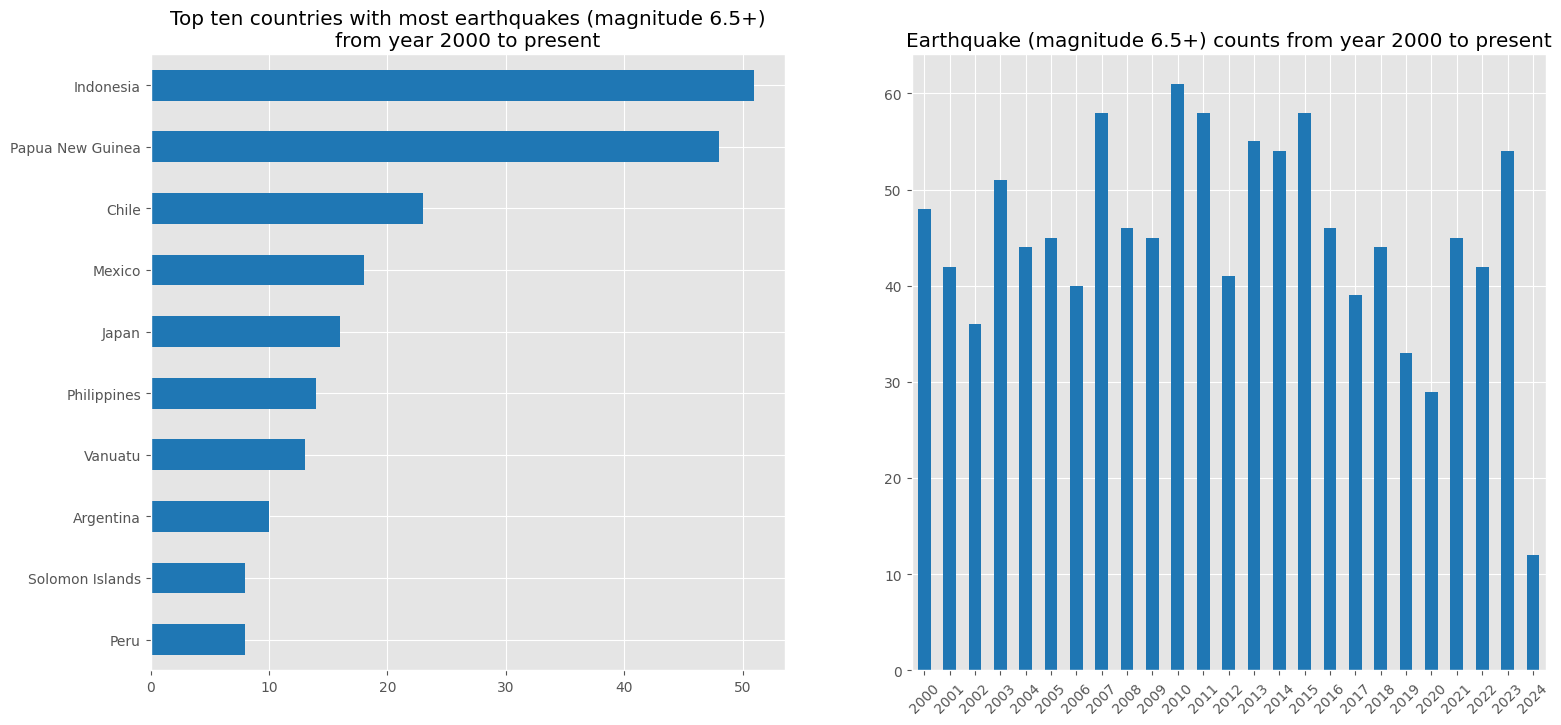

In [95]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, axs = plt.subplots(1, 2, figsize=(18, 8))

modified_data.country.value_counts().sort_values().tail(10).plot(kind='barh', color = 'tab:blue', ax = axs[0])
modified_data.year.value_counts().sort_index().plot(kind='bar', color = 'tab:blue', ax = axs[1])
axs[0].set_title('Top ten countries with most earthquakes (magnitude 6.5+)\nfrom year 2000 to present')
axs[0].set_ylabel('')
axs[1].set_title('Earthquake (magnitude 6.5+) counts from year 2000 to present')
axs[1].tick_params(axis='x', labelrotation=45)
axs[1].set_xlabel('')

plt.show()